This notebook is part of the $\omega radlib$ documentation: https://docs.wradlib.org.

Copyright (c) $\omega radlib$ developers.
Distributed under the MIT License. See LICENSE.txt for more info.

# Load and inspect data from a Rainbow file

In [1]:
import wradlib as wrl
import matplotlib.pyplot as pl
import numpy as np
import warnings
warnings.filterwarnings('ignore')
try:
    get_ipython().magic("matplotlib inline")
except:
    pl.ion()

#### Load Rainbow file

In [2]:
filename = wrl.util.get_wradlib_data_file('rainbow/2013070308340000dBuZ.azi')
rbdict = wrl.io.read_rainbow(filename)

#### Get azimuthal data

In [3]:
azi = rbdict['volume']['scan']['slice']['slicedata']['rayinfo']['data']
azidepth = float(rbdict['volume']['scan']['slice']
                 ['slicedata']['rayinfo']['@depth'])
azirange = float(rbdict['volume']['scan']['slice']
                 ['slicedata']['rayinfo']['@rays'])
azires = float(rbdict['volume']['scan']['slice']['anglestep'])
azi = (azi * azirange / 2**azidepth) * azires

#### Create range array

In [4]:
stoprange = float(rbdict['volume']['scan']['slice']['stoprange'])
rangestep = float(rbdict['volume']['scan']['slice']['rangestep'])
r = np.arange(0, stoprange, rangestep)

#### Get reflectivity data

In [5]:
data = rbdict['volume']['scan']['slice']['slicedata']['rawdata']['data']
datadepth = float(rbdict['volume']['scan']['slice']
                  ['slicedata']['rawdata']['@depth'])
datamin = float(rbdict['volume']['scan']['slice']
                ['slicedata']['rawdata']['@min'])
datamax = float(rbdict['volume']['scan']['slice']
                ['slicedata']['rawdata']['@max'])
data = datamin + data * (datamax - datamin) / 2 ** datadepth

#### Get annotation data

In [6]:
unit = rbdict['volume']['scan']['slice']['slicedata']['rawdata']['@type']
time = rbdict['volume']['scan']['slice']['slicedata']['@time']
date = rbdict['volume']['scan']['slice']['slicedata']['@date']
lon = rbdict['volume']['sensorinfo']['lon']
lat = rbdict['volume']['sensorinfo']['lat']
sensortype = rbdict['volume']['sensorinfo']['@type']
sensorname = rbdict['volume']['sensorinfo']['@name']

#### Plot data with annotation

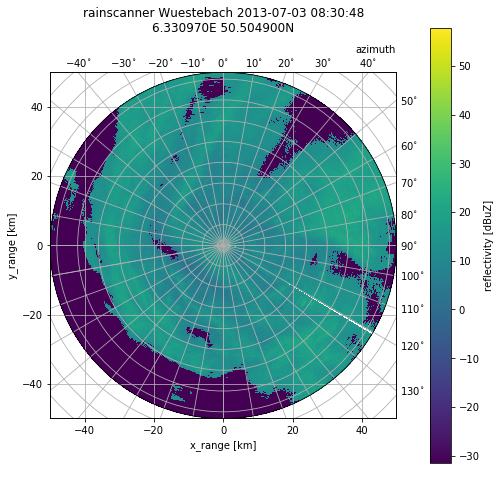

In [7]:
fig = pl.figure(figsize=(8,8))
cgax, pm = wrl.vis.plot_ppi(data, r=r, az=azi, fig=fig, proj='cg')

title = '{0} {1} {2} {3}\n{4}E {5}N'.format(sensortype, sensorname, date,
                                            time, lon, lat)
caax = cgax.parasites[0]
t = pl.title(title, fontsize=12)
t.set_y(1.1)
cbar = pl.gcf().colorbar(pm, pad=0.075)
caax.set_xlabel('x_range [km]')
caax.set_ylabel('y_range [km]')
pl.text(1.0, 1.05, 'azimuth', transform=caax.transAxes, va='bottom',
        ha='right')
cbar.set_label('reflectivity [' + unit + ']')